In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
df_mk1        = pd.read_csv("clean_data/clean_data_mk1_i5pyilec.csv")
df_mk2        = pd.read_csv("clean_data/clean_data_mk2_dzoz67y9.csv")
df_mk3        = pd.read_csv("clean_data/clean_data_mk3_mklqs5l0.csv")
df_mk4        = pd.read_csv("clean_data/clean_data_mk4_080ps8pg.csv")
combined_data = pd.read_csv("clean_data/combined_data/combined_data.csv")

In [28]:
combined_data = combined_data.loc[combined_data["prolific_id"] != "I am the experimenter."] #exclude us, i.e. player 4 in first pilot
combined_data = combined_data.loc[combined_data["participant_code"] != "j89thiah"] #exclude woman with baby in session 1, i.e. player 5 in first pilot.
combined_data = combined_data.loc[combined_data["participant_code"] != "97ajc1w1"] #exclude p4 in session Mklqs5l0, was inactive during entire thing except for round 1 (dropout)- 

#Create unique players
combined_data["player_nb"] = combined_data["player"]
combined_data["player"] = combined_data["player"].astype(str)
combined_data["player"] = combined_data["player"] + combined_data["participant_code"]

#combine session code with mastok session
combined_data['mk_session'] = combined_data['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
combined_data['mk_session'] = combined_data['mk_session'] + "_" + combined_data['session_code']


#Create a new column for manip of other player in each dyad. 
combined_data["other_manipulation"] = np.where(combined_data["manipulation"] == "dominant", "submissive", "dominant")
#Create a new column categorizing sent offers as either fair or unfair. 1 = fair, 0 = unfair
combined_data["fair_offer"]         = np.where(combined_data["sent_amount"] >=5, 1, 0)

<Figure size 1000x800 with 0 Axes>

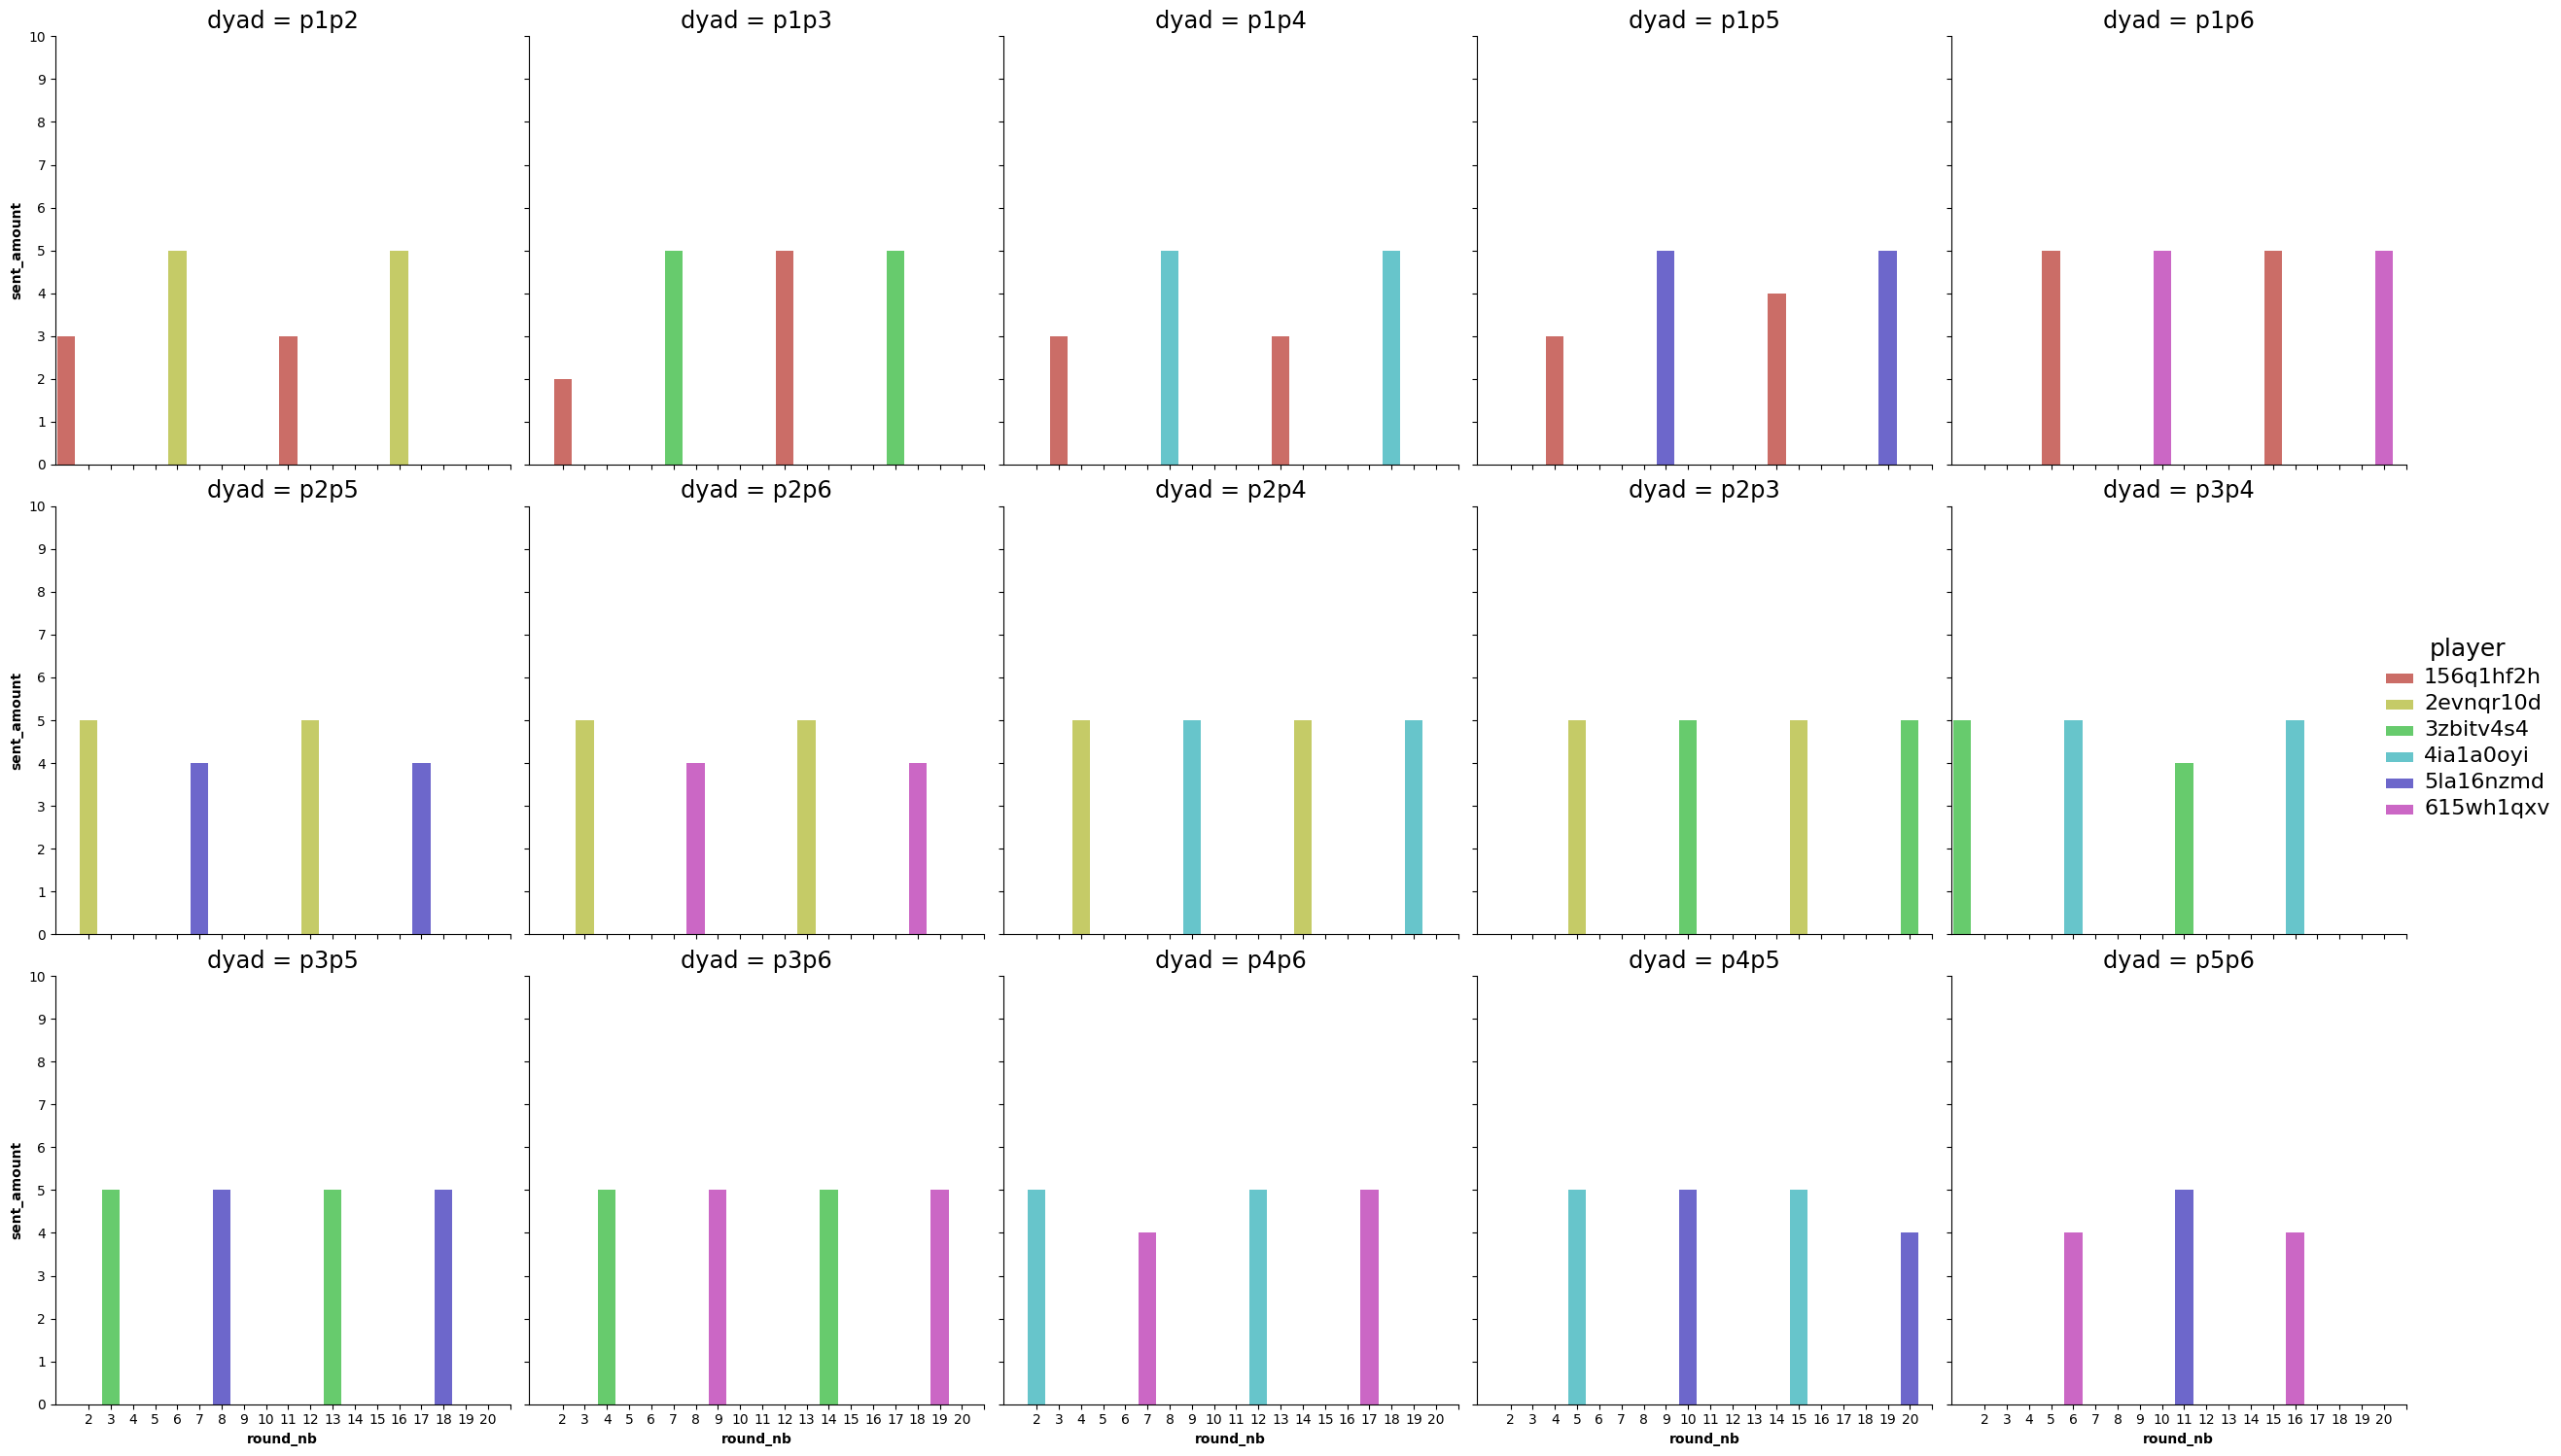

In [48]:

df_mk2 = combined_data.loc[combined_data["mk_session"] == "mk_2_dzoz67y9"]
palette = sns.color_palette("hls", 6)
player_list = df_mk2['player'].unique() # get the list of unique players
color_dict = dict(zip(player_list, palette)) # map the players to the colors
df_mk2.loc[df_mk2["role"] == "responder", "sent_amount"] = np.nan
plt.figure(figsize=(10, 8))
mk2_plot = sns.catplot(x = "round_nb", y = "sent_amount", data=df_mk2, col="dyad", col_wrap=5, kind="bar", palette=color_dict, hue='player', dodge=False)
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))
mk2_plot.set(xticks=df_mk2["round_nb"].unique())
plt.setp(mk2_plot._legend.get_texts(), fontsize='16') # for legend text
plt.setp(mk2_plot._legend.get_title(), fontsize='18') # for legend title
mk2_plot.set_titles(size='xx-large')  # Change size to desired value
# To make the titles bold
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("mk2_plot.png", dpi=300)

<Figure size 1000x800 with 0 Axes>

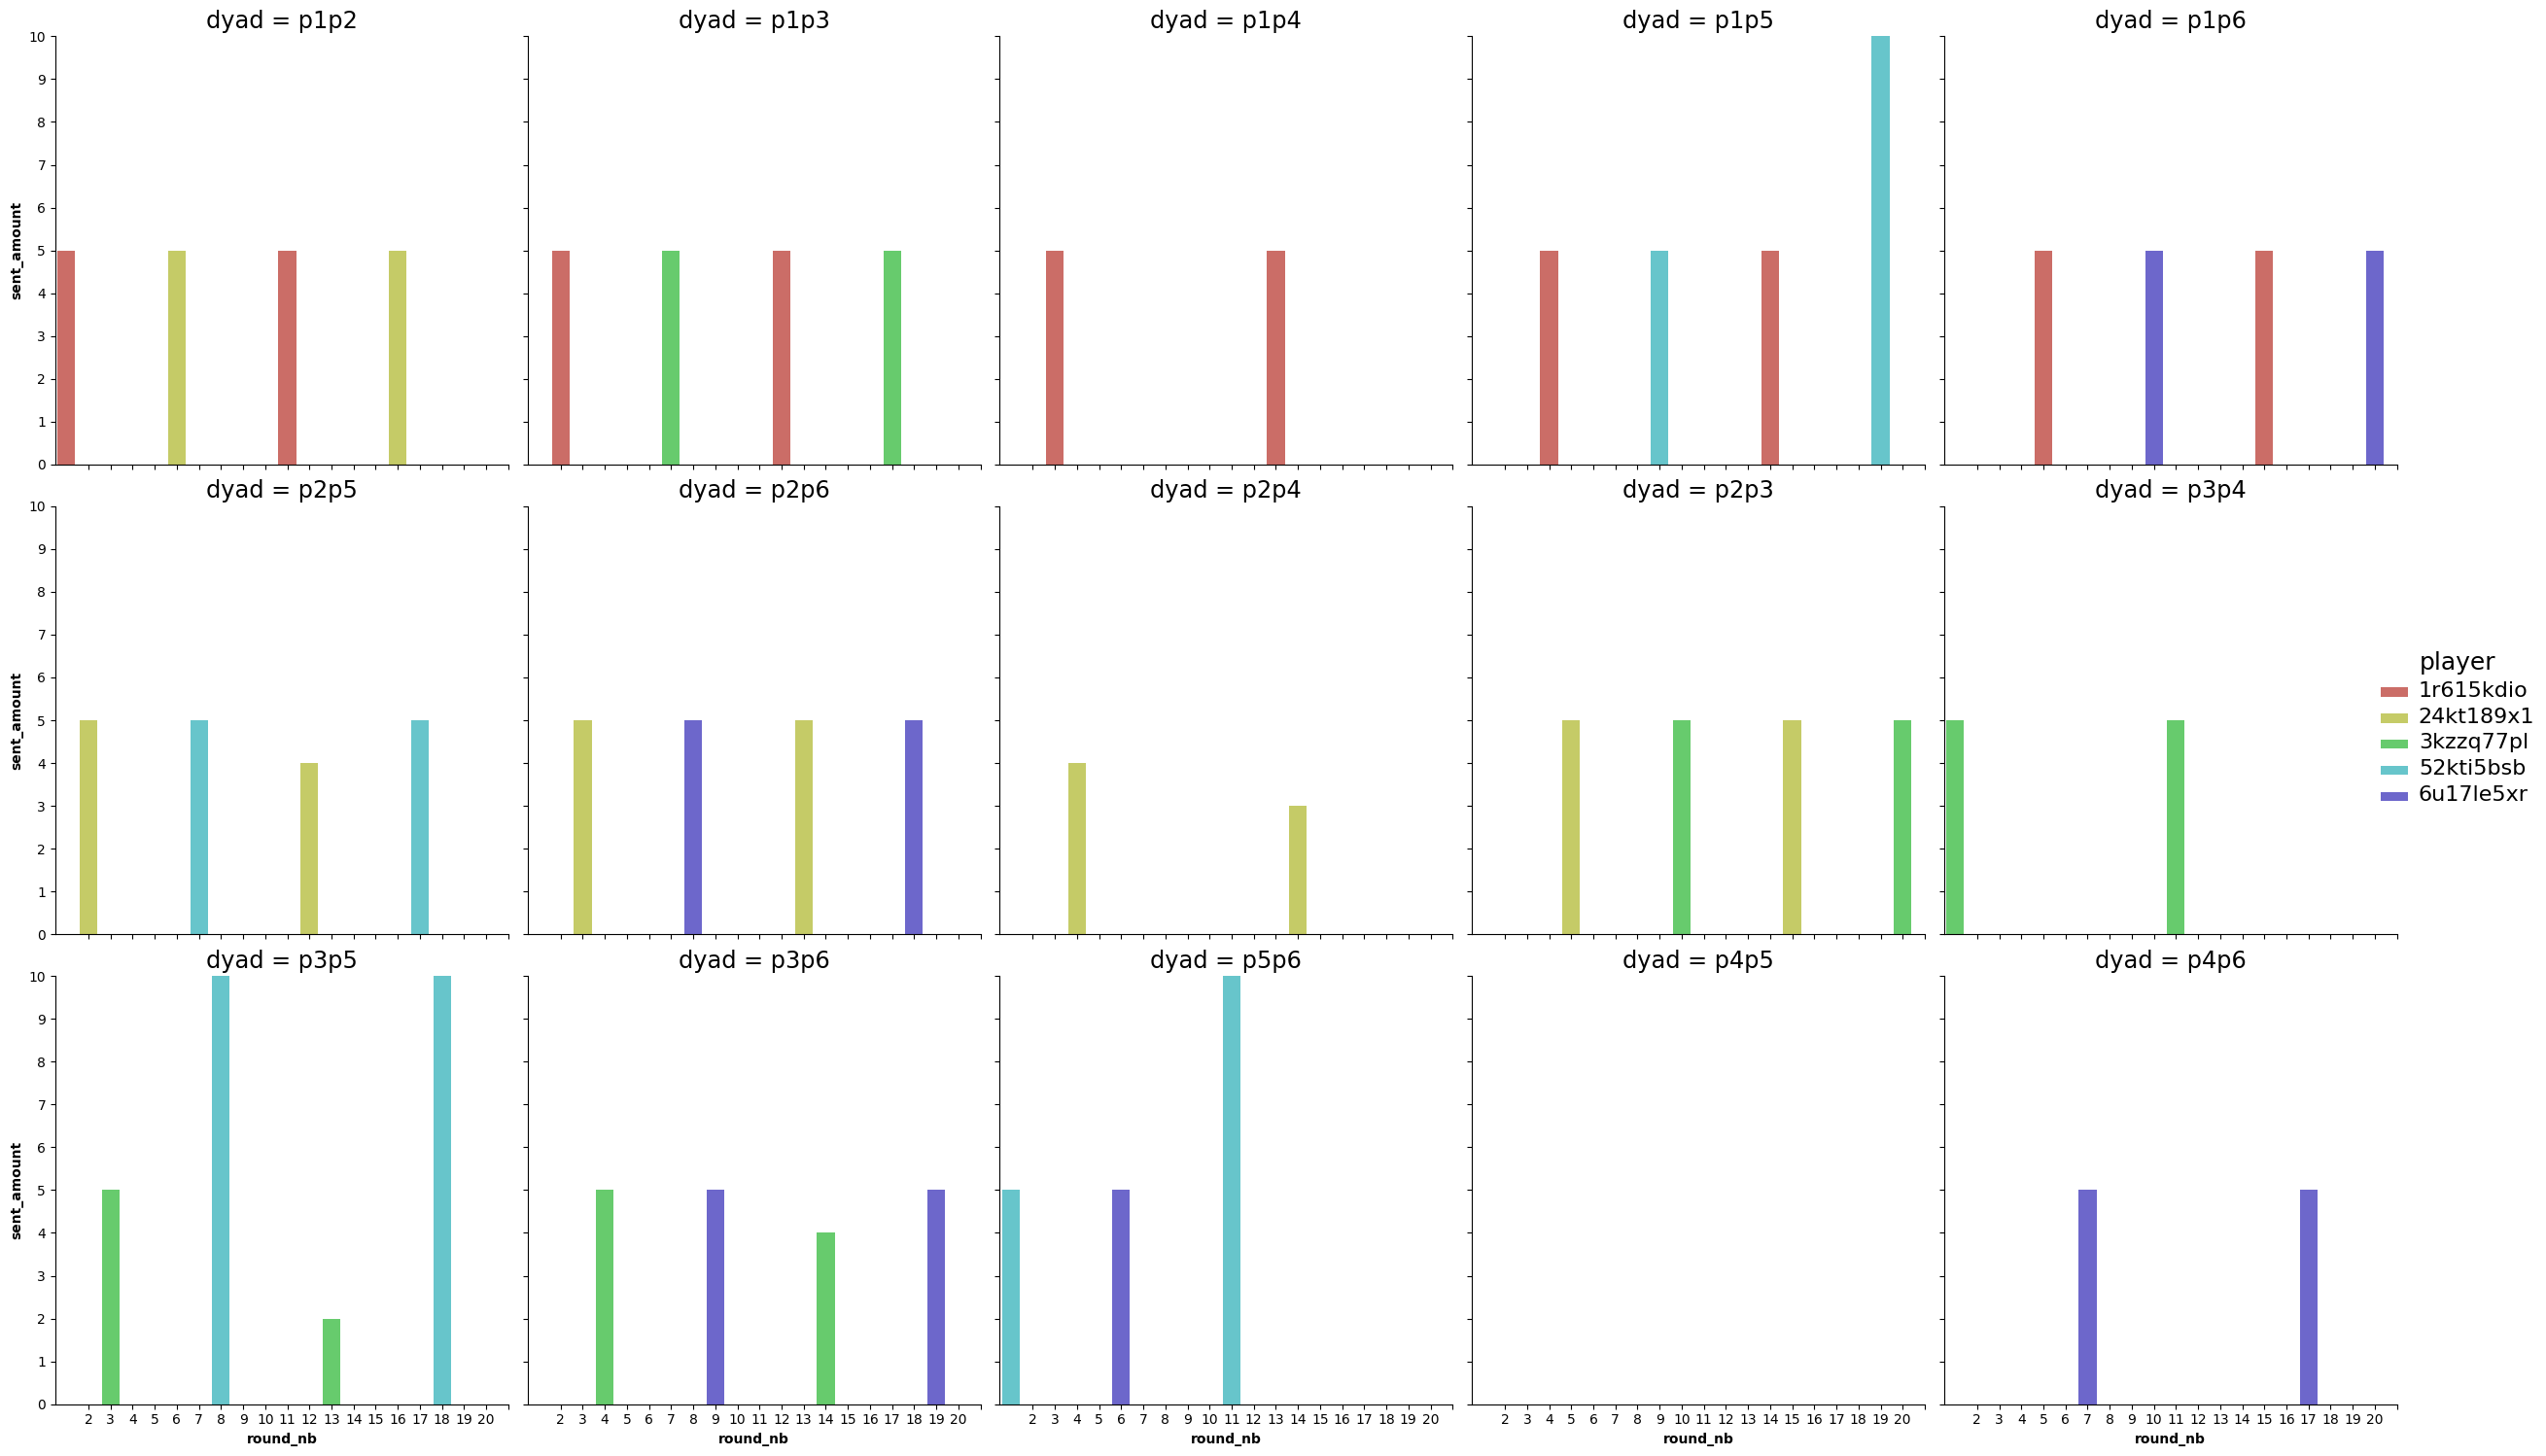

In [52]:
df_mk3 = combined_data.loc[combined_data["mk_session"] == "mk_3_mklqs5l0"]
palette = sns.color_palette("hls", 6)
player_list = df_mk3['player'].unique() # get the list of unique players
color_dict = dict(zip(player_list, palette)) # map the players to the colors
df_mk3.loc[df_mk3["role"] == "responder", "sent_amount"] = np.nan
plt.figure(figsize=(10, 8))
mk3_plot = sns.catplot(x = "round_nb", y = "sent_amount", data=df_mk3, col="dyad", col_wrap=5, kind="bar", palette=color_dict, hue='player', dodge=False)
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))
mk3_plot.set(xticks=df_mk3["round_nb"].unique())
plt.setp(mk3_plot._legend.get_texts(), fontsize='16') # for legend text
plt.setp(mk3_plot._legend.get_title(), fontsize='18') # for legend title
mk3_plot.set_titles(size='xx-large')  # Change size to desired value
# To make the titles bold
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("mk3_plot.png", dpi=300)

<Figure size 1000x800 with 0 Axes>

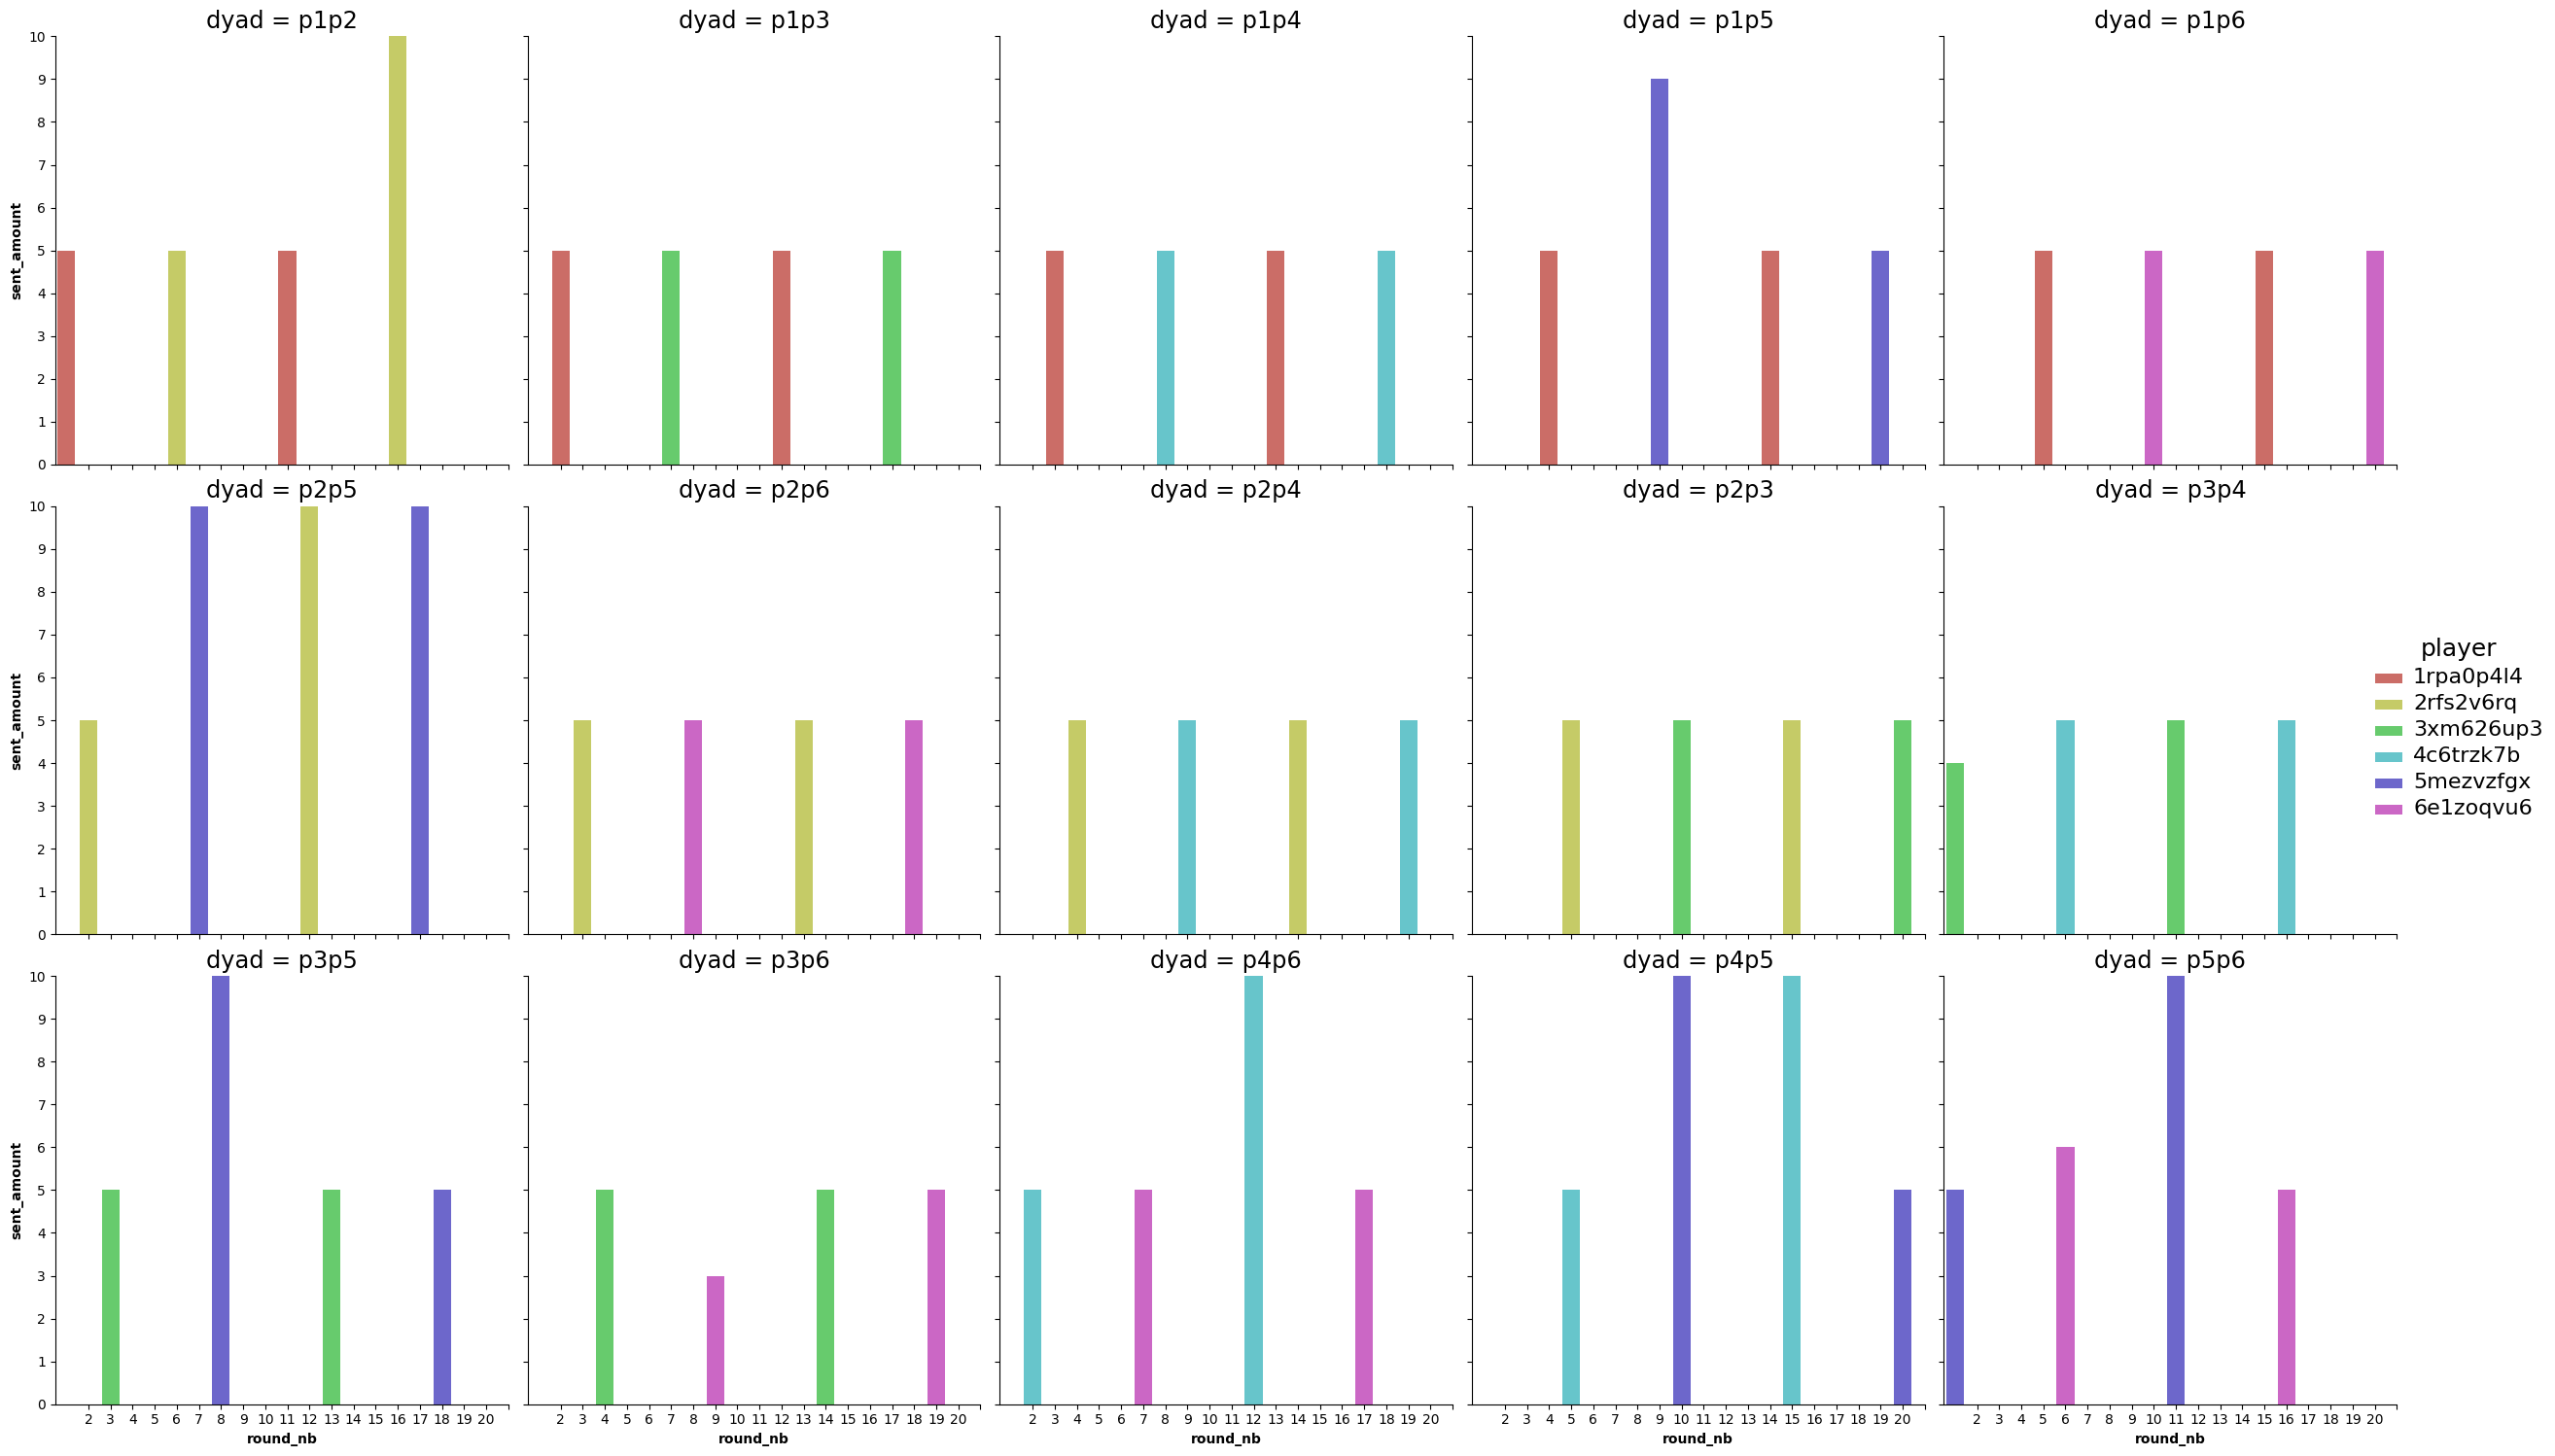

In [53]:
df_mk4 = combined_data.loc[combined_data["mk_session"] == "mk_4_080ps8pg"]
palette = sns.color_palette("hls", 6)
player_list = df_mk4['player'].unique() # get the list of unique players
color_dict = dict(zip(player_list, palette)) # map the players to the colors
df_mk4.loc[df_mk4["role"] == "responder", "sent_amount"] = np.nan
plt.figure(figsize=(10, 8))
mk3_plot = sns.catplot(x = "round_nb", y = "sent_amount", data=df_mk4, col="dyad", col_wrap=5, kind="bar", palette=color_dict, hue='player', dodge=False)
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))
mk3_plot.set(xticks=df_mk4["round_nb"].unique())
plt.setp(mk3_plot._legend.get_texts(), fontsize='16') # for legend text
plt.setp(mk3_plot._legend.get_title(), fontsize='18') # for legend title
mk3_plot.set_titles(size='xx-large')  # Change size to desired value
# To make the titles bold
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("mk4_plot.png", dpi=300)